# Final Project: Estimating Urbanization Rate of the U.S.A using Global Sugar Consumption dataset

##### Tanya Chen, Emily Wang

## Introduction

## Model Training

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error

In [2]:
import statsmodels.api as sm

In [3]:
from ISLP.models import (ModelSpec as MS, summarize, poly)

### Read Dataset

In [4]:
sugar = pd.read_csv('sugar_consumption_dataset.csv') 

In [5]:
sugar.head()

,Country,Year,Country_Code,Continent,Region,Population,GDP_Per_Capita,Per_Capita_Sugar_Consumption,Total_Sugar_Consumption,Sugar_From_Sugarcane,...,Obesity_Rate,Sugar_Imports,Sugar_Exports,Avg_Retail_Price_Per_Kg,Gov_Tax,Gov_Subsidies,Education_Campaign,Urbanization_Rate,Climate_Conditions,Sugarcane_Production_Yield
0,France,1972,FRA,Europe,Western Europe,2.617306e+08,8692.631696,12.827741,3.357413e+06,68.422963,...,34.094017,5.401670e+06,2.358929e+06,3.864020,0.0,0,0.0,34.503398,3,52.433972
1,Australia,2003,AUS,Oceania,Australia & New Zealand,1.737965e+08,6859.195960,21.362632,3.712750e+06,55.432564,...,16.040118,3.418790e+06,9.694348e+06,3.282101,0.0,0,0.0,31.783067,4,58.382055
2,Germany,1963,DEU,Europe,Western Europe,1.236366e+08,22075.950575,32.077485,3.965951e+06,86.466120,...,14.405741,8.987281e+06,5.451632e+06,1.097687,0.0,0,0.0,51.551345,1,32.184735
3,France,1965,FRA,Europe,Western Europe,2.989961e+08,3728.027392,47.648930,1.424685e+07,69.806707,...,38.499271,5.179004e+06,8.048500e+06,2.761297,0.0,0,0.0,80.386281,2,84.296019
4,Germany,2010,DEU,Europe,Western Europe,7.341531e+06,40420.973962,23.214343,1.704288e+05,63.772278,...,36.190977,6.463439e+06,7.062910e+06,4.219431,0.0,0,1.0,49.701153,3,66.110815


In [6]:
sugar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       10000 non-null  object 
 1   Year                          10000 non-null  int64  
 2   Country_Code                  10000 non-null  object 
 3   Continent                     10000 non-null  object 
 4   Region                        10000 non-null  object 
 5   Population                    10000 non-null  float64
 6   GDP_Per_Capita                10000 non-null  float64
 7   Per_Capita_Sugar_Consumption  10000 non-null  float64
 8   Total_Sugar_Consumption       10000 non-null  float64
 9   Sugar_From_Sugarcane          10000 non-null  float64
 10  Sugar_From_Beet               10000 non-null  float64
 11  Sugar_From_HFCS               10000 non-null  float64
 12  Sugar_From_Other              10000 non-null  float64
 13  Pr

In [7]:
sugar.dropna(inplace=True)
#print(sugar.isna().sum())

In [8]:
sugar.columns

Index(['Country', 'Year', 'Country_Code', 'Continent', 'Region', 'Population',
       'GDP_Per_Capita', 'Per_Capita_Sugar_Consumption',
       'Total_Sugar_Consumption', 'Sugar_From_Sugarcane', 'Sugar_From_Beet',
       'Sugar_From_HFCS', 'Sugar_From_Other', 'Processed_Food_Consumption',
       'Avg_Daily_Sugar_Intake', 'Diabetes_Prevalence', 'Obesity_Rate',
       'Sugar_Imports', 'Sugar_Exports', 'Avg_Retail_Price_Per_Kg', 'Gov_Tax',
       'Gov_Subsidies', 'Education_Campaign', 'Urbanization_Rate',
       'Climate_Conditions', 'Sugarcane_Production_Yield'],
      dtype='object')

In [9]:
sugar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8974 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       8974 non-null   object 
 1   Year                          8974 non-null   int64  
 2   Country_Code                  8974 non-null   object 
 3   Continent                     8974 non-null   object 
 4   Region                        8974 non-null   object 
 5   Population                    8974 non-null   float64
 6   GDP_Per_Capita                8974 non-null   float64
 7   Per_Capita_Sugar_Consumption  8974 non-null   float64
 8   Total_Sugar_Consumption       8974 non-null   float64
 9   Sugar_From_Sugarcane          8974 non-null   float64
 10  Sugar_From_Beet               8974 non-null   float64
 11  Sugar_From_HFCS               8974 non-null   float64
 12  Sugar_From_Other              8974 non-null   float64
 13  Processe

### Tidy Data

In [10]:
sugar.dropna(inplace=True)
#print(sugar.isna().sum())

In [11]:
sugar2 = sugar[sugar['Country'] == 'USA']

In [12]:
sugar2 = sugar.drop(columns=['Country','Country_Code','Continent','Region','Education_Campaign', 'Climate_Conditions'])

In [13]:
sugar2.head()

,Year,Population,GDP_Per_Capita,Per_Capita_Sugar_Consumption,Total_Sugar_Consumption,Sugar_From_Sugarcane,Sugar_From_Beet,Sugar_From_HFCS,Sugar_From_Other,Processed_Food_Consumption,Avg_Daily_Sugar_Intake,Diabetes_Prevalence,Obesity_Rate,Sugar_Imports,Sugar_Exports,Avg_Retail_Price_Per_Kg,Gov_Tax,Gov_Subsidies,Urbanization_Rate,Sugarcane_Production_Yield
0,1972,2.617306e+08,8692.631696,12.827741,3.357413e+06,68.422963,38.600384,42.970760,-49.994107,171.966182,35.148009,11.495111,34.094017,5.401670e+06,2.358929e+06,3.864020,0.0,0,34.503398,52.433972
1,2003,1.737965e+08,6859.195960,21.362632,3.712750e+06,55.432564,38.463620,16.223681,-10.119866,229.238022,58.533611,6.517479,16.040118,3.418790e+06,9.694348e+06,3.282101,0.0,0,31.783067,58.382055
2,1963,1.236366e+08,22075.950575,32.077485,3.965951e+06,86.466120,10.001416,51.720631,-48.188167,203.263252,87.892309,8.252688,14.405741,8.987281e+06,5.451632e+06,1.097687,0.0,0,51.551345,32.184735
3,1965,2.989961e+08,3728.027392,47.648930,1.424685e+07,69.806707,34.005173,43.573774,-47.385654,34.177283,130.558067,10.997905,38.499271,5.179004e+06,8.048500e+06,2.761297,0.0,0,80.386281,84.296019
4,2010,7.341531e+06,40420.973962,23.214343,1.704288e+05,63.772278,23.105924,53.543595,-40.421797,78.733482,63.607299,14.893879,36.190977,6.463439e+06,7.062910e+06,4.219431,0.0,0,49.701153,66.110815


In [14]:
sugar3 = sugar2.drop(columns='Urbanization_Rate')


### Linear Regression Model

In [15]:
#linear regression 
y = sugar2['Urbanization_Rate']

X = MS(sugar3).fit_transform(sugar2) 
model = sm.OLS(y, X)
results = model.fit() 
summarize(results) 

,coef,std err,t,P>|t|
intercept,1.560000e-02,1.100000e-02,1.470,0.142
Year,5.500000e-03,1.300000e-02,0.414,0.679
Population,1.906000e-09,6.290000e-09,0.303,0.762
GDP_Per_Capita,-9.207000e-06,1.720000e-05,-0.534,0.593
Per_Capita_Sugar_Consumption,1.200000e-03,3.000000e-03,0.403,0.687
Total_Sugar_Consumption,-2.386000e-09,1.500000e-07,-0.016,0.987
Sugar_From_Sugarcane,3.861000e-01,2.640000e-01,1.461,0.144
Sugar_From_Beet,3.736000e-01,2.650000e-01,1.407,0.159
Sugar_From_HFCS,3.954000e-01,2.650000e-01,1.491,0.136
Sugar_From_Other,4.001000e-01,2.650000e-01,1.510,0.131


### Cross-Validate Global Sugar Consumprtion dataset

In [16]:
# Split the dataset into training data and test data

# Training data: 2016-2020
# Response: Urbanization rate
# Predcitor: All other variables

# Drop rows with missing values in sugar2 and align sugar3
sugar_dropna = sugar2.dropna()
sugar3_clean = sugar3.loc[sugar_dropna.index]  # align predictors

# Target variable
y = sugar_dropna['Urbanization_Rate']

# Boolean masks based on cleaned sugar3
train_mask = (sugar3_clean['Year'] >= 2016) & (sugar3_clean['Year'] <= 2020)
test_mask = sugar3_clean['Year'] > 2020

# Apply masks
x_train = sugar3_clean[train_mask]
y_train = y.loc[train_mask]

x_test = sugar3_clean[test_mask]
y_test = y.loc[test_mask]



In [17]:
# Train a linear regression model using the train data
# Fit a least squares regression model
least_squares = skl.LinearRegression()
least_squares.fit(x_train, y_train)

lr_pred = least_squares.predict(x_test)

# Find the mean squared error for the linear regression model
mse = mean_squared_error(y_test, lr_pred)

print(mse)

553.8987354382072


Looking at some other models

In [18]:
#looking into diabetes very simplily
y_diabetes = sugar2['Diabetes_Prevalence']
sugar_diabetes = sugar2.columns.drop('Diabetes_Prevalence')

X_d = MS(sugar_diabetes).fit_transform(sugar2) 
model = sm.OLS(y_diabetes, X_d)
results_d = model.fit() 
summarize(results_d) 

,coef,std err,t,P>|t|
intercept,3.700000e-03,2.000000e-03,2.150,0.032
Year,-4.000000e-04,2.000000e-03,-0.170,0.865
Population,4.626000e-10,1.030000e-09,0.451,0.652
GDP_Per_Capita,-1.071000e-06,2.810000e-06,-0.381,0.703
Per_Capita_Sugar_Consumption,2.900000e-03,0.000000e+00,5.786,0.000
Total_Sugar_Consumption,9.172000e-09,2.450000e-08,0.374,0.708
Sugar_From_Sugarcane,9.110000e-02,4.300000e-02,2.114,0.035
Sugar_From_Beet,9.280000e-02,4.300000e-02,2.144,0.032
Sugar_From_HFCS,9.440000e-02,4.300000e-02,2.183,0.029
Sugar_From_Other,9.260000e-02,4.300000e-02,2.144,0.032


In [19]:
#looking into obesity very simplily
y_obe = sugar2['Obesity_Rate']
sugar_obe = sugar2.columns.drop('Obesity_Rate')

X_o = MS(sugar_obe).fit_transform(sugar2) 
model = sm.OLS(y_obe, X_o)
results_obe = model.fit() 
summarize(results_obe) 

,coef,std err,t,P>|t|
intercept,1.510000e-02,5.000000e-03,3.264,0.001
Year,-8.200000e-03,6.000000e-03,-1.414,0.157
Population,1.437000e-09,2.750000e-09,0.522,0.601
GDP_Per_Capita,7.416000e-06,7.530000e-06,0.985,0.325
Per_Capita_Sugar_Consumption,1.500000e-03,1.000000e-03,1.148,0.251
Total_Sugar_Consumption,-5.633000e-08,6.560000e-08,-0.858,0.391
Sugar_From_Sugarcane,3.827000e-01,1.150000e-01,3.317,0.001
Sugar_From_Beet,3.966000e-01,1.160000e-01,3.422,0.001
Sugar_From_HFCS,3.592000e-01,1.160000e-01,3.103,0.002
Sugar_From_Other,3.694000e-01,1.160000e-01,3.193,0.001


In [20]:
#looking into obesity very simplily
y_process = sugar2['Processed_Food_Consumption']
sugar_process = sugar2.columns.drop('Processed_Food_Consumption')

X_p = MS(sugar_process).fit_transform(sugar2) 
model = sm.OLS(y_process, X_p)
results_p = model.fit() 
summarize(results_p) 

,coef,std err,t,P>|t|
intercept,7.140000e-02,3.800000e-02,1.863,0.063
Year,-1.400000e-02,4.800000e-02,-0.292,0.770
Population,-7.730000e-09,2.280000e-08,-0.339,0.735
GDP_Per_Capita,-5.826000e-05,6.250000e-05,-0.933,0.351
Per_Capita_Sugar_Consumption,-5.500000e-03,1.100000e-02,-0.493,0.622
Total_Sugar_Consumption,1.867000e-07,5.440000e-07,0.343,0.732
Sugar_From_Sugarcane,1.847000e+00,9.580000e-01,1.928,0.054
Sugar_From_Beet,1.840400e+00,9.620000e-01,1.913,0.056
Sugar_From_HFCS,1.689100e+00,9.610000e-01,1.758,0.079
Sugar_From_Other,1.766000e+00,9.600000e-01,1.839,0.066


Tree-based methods

In [21]:
# load the packages 
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR, plot_tree, export_text)
from sklearn.metrics import (accuracy_score ,log_loss) 
from sklearn.ensemble import \
    (RandomForestRegressor as RF, GradientBoostingRegressor as GBR)


[Text(0.5, 0.875, 'Sugar_From_Other <= 31.938\nsquared_error = 560.114\nsamples = 687\nvalue = 50.565'),
 Text(0.25, 0.625, 'Processed_Food_Consumption <= 91.475\nsquared_error = 602.139\nsamples = 46\nvalue = 40.777'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Population <= 35252.891\nsquared_error = 582.714\nsamples = 22\nvalue = 51.16'),
 Text(0.0625, 0.125, 'squared_error = 305.356\nsamples = 15\nvalue = 60.15'),
 Text(0.1875, 0.125, 'squared_error = 632.77\nsamples = 7\nvalue = 31.896'),
 Text(0.375, 0.375, 'Diabetes_Prevalence <= 7.845\nsquared_error = 430.514\nsamples = 24\nvalue = 31.258'),
 Text(0.3125, 0.125, 'squared_error = 152.14\nsamples = 2\nvalue = 72.71'),
 Text(0.4375, 0.125, 'squared_error = 285.415\nsamples = 22\nvalue = 27.49'),
 Text(0.75, 0.625, 'GDP_Per_Capita <= 65.659\nsquared_error = 549.73\nsamples = 641\nvalue = 51.267'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Year <= 38574870.0\nsquared_error = 543.518\nsamples = 596\nvalue = 52.052')

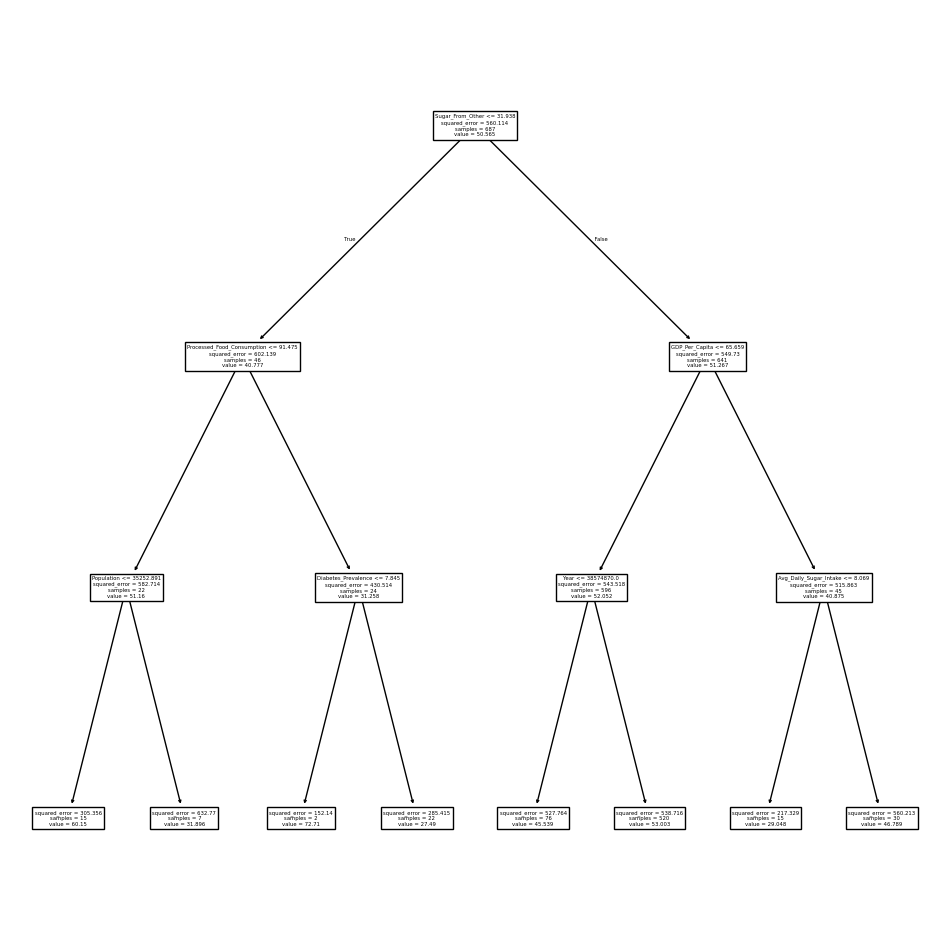

In [22]:
feature_names = list(X.columns)
reg = DTR(max_depth=3) 
reg.fit(x_train, y_train)
ax = subplots(figsize=(12,12))[1] 
plot_tree(reg,feature_names=feature_names, ax=ax)

In [23]:
ccp_path = reg.cost_complexity_pruning_path(x_train, y_train) 
kfold = skm.KFold(5,shuffle=True,random_state=10) 
grid = skm.GridSearchCV(reg, 
        {'ccp_alpha': ccp_path.ccp_alphas}, 
        refit=True, cv=kfold, 
        scoring='neg_mean_squared_error')
G = grid.fit(x_train, y_train)

In [24]:
best_ = grid.best_estimator_
np.mean((y_test - best_.predict(x_test))**2)

525.5580198920233

[Text(0.5, 0.5, 'squared_error = 560.114\nsamples = 687\nvalue = 50.565')]

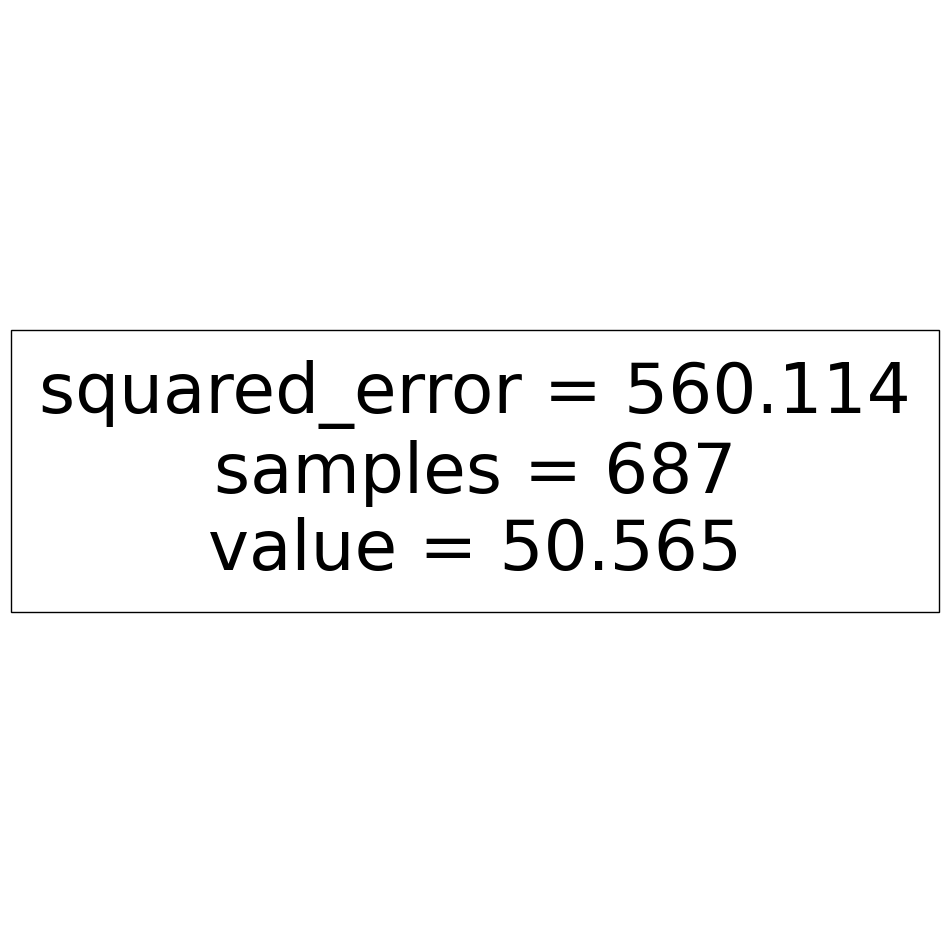

In [25]:
ax = subplots(figsize=(12,12))[1] 
plot_tree(G.best_estimator_ , feature_names=feature_names, ax=ax)

Bagging and random Forests

In [26]:
bag_sugar = RF(max_features=x_train.shape[1], random_state=0) 
bag_sugar.fit(x_train, y_train)

RandomForestRegressor(max_features=19, random_state=0)

565.413167302928

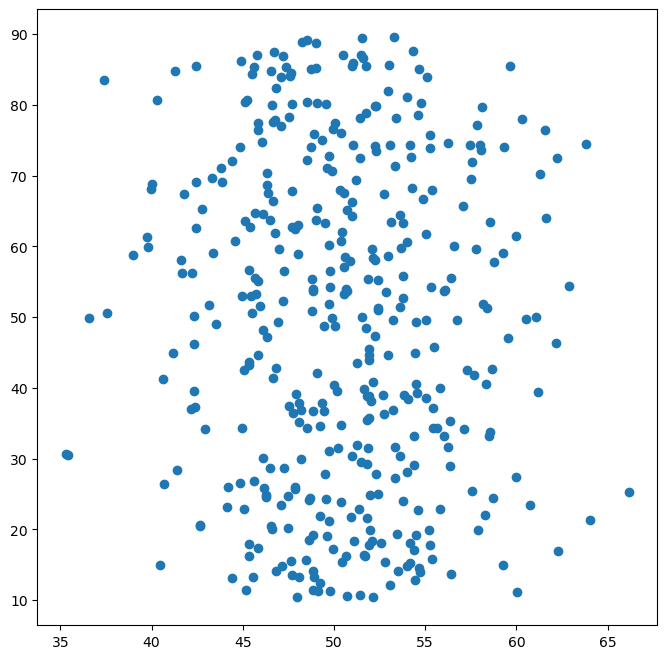

In [27]:
ax = subplots(figsize=(8,8))[1] 
y_hat_bag = bag_sugar.predict(x_test) 
ax.scatter(y_hat_bag, y_test) 
np.mean((y_test - y_hat_bag)**2)

In [28]:
bag_sugar = RF(max_features=x_train.shape[1], n_estimators=500,random_state=0).fit(x_train, y_train) 
y_hat_bag = bag_sugar.predict(x_test)
np.mean((y_test - y_hat_bag)**2)

551.6809620696954

In [29]:
#random forests
RF_sugar = RF(max_features=6,
              random_state=0).fit(x_train,y_train)
y_hat_RF = RF_sugar.predict(x_test) 
np.mean((y_test - y_hat_RF)**2)

562.1854581965181

In [30]:
feature_names_train = list(x_train.columns)
feature_imp = pd.DataFrame( {'importance':RF_sugar.feature_importances_}, index=feature_names_train) 
feature_imp.sort_values(by='importance', ascending=False)

,importance
Diabetes_Prevalence,0.068450
Sugar_Exports,0.067745
Obesity_Rate,0.066479
Avg_Retail_Price_Per_Kg,0.064212
GDP_Per_Capita,0.064132
Sugar_Imports,0.063106
Sugar_From_Beet,0.062822
Population,0.062709
Sugar_From_HFCS,0.061324
Processed_Food_Consumption,0.060819


Boosting

In [46]:
boost_sugar = GBR(n_estimators=500,
                    learning_rate=0.001, 
                    max_depth=3, 
                    random_state=0)
boost_sugar.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=500, random_state=0)

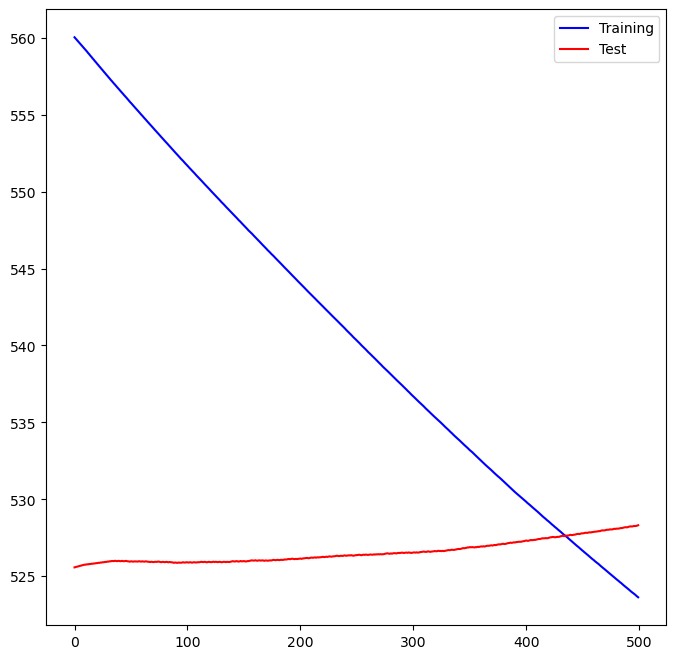

In [47]:
test_error = np.zeros_like(boost_sugar.train_score_)
for idx, y_ in enumerate(boost_sugar.staged_predict(x_test)):
    test_error[idx] = np.mean((y_test - y_)**2)

plot_idx = np.arange(boost_sugar.train_score_.shape[0]) 
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost_sugar.train_score_, 'b',
        label='Training')

ax.plot(plot_idx, test_error ,
        'r',
        label='Test') 
ax.legend();

In [48]:
y_hat_boost = boost_sugar.predict(x_test); 
np.mean((y_test - y_hat_boost)**2)

528.3135888934872